In [7]:
library(tidyverse)
library(EnvStats)
list.files(path = "../input")


Attaching package: ‘EnvStats’


The following objects are masked from ‘package:stats’:

    predict, predict.lm


The following object is masked from ‘package:base’:

    print.default




character(0)

In [19]:
#a switchboard gets 2.5 calls on average on wednesday mornings. 
#What is the probability of receiving 6 calls?
dpois((0:6), lambda = 2.5)

[1] 0.08208500 0.20521250 0.25651562 0.21376302 0.13360189 0.06680094 0.02783373

In [2]:
#this shows the individual probability for example of a cookie having 0 to 20 chocolate chips
#when the expected number of chips is 4. as we can see, as the number of chips increases
#the probability becomes infinitely small
dpois((0:20), lambda = 4)

[1] 1.831564e-02 7.326256e-02 1.465251e-01 1.953668e-01 1.953668e-01
 [6] 1.562935e-01 1.041956e-01 5.954036e-02 2.977018e-02 1.323119e-02
[11] 5.292477e-03 1.924537e-03 6.415123e-04 1.973884e-04 5.639669e-05
[16] 1.503912e-05 3.759779e-06 8.846539e-07 1.965898e-07 4.138732e-08
[21] 8.277464e-09

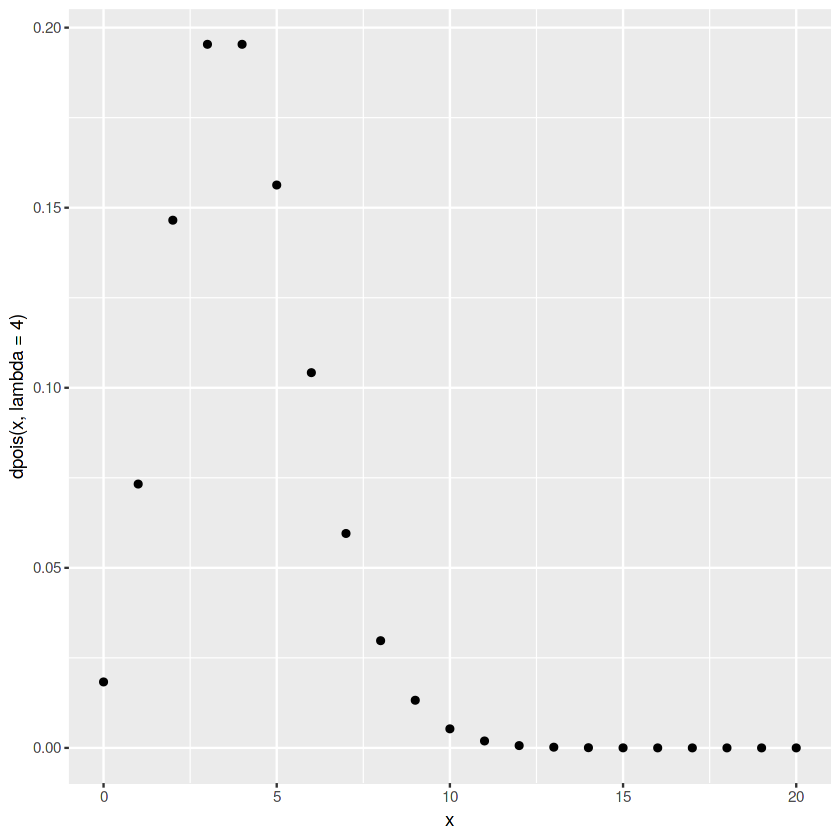

In [3]:
#20 random generations of poission distributions for a lambda of 4
ggplot(data.frame(x=c(0:20)), aes(x)) +
geom_point(aes(y=dpois(x, lambda=4)))

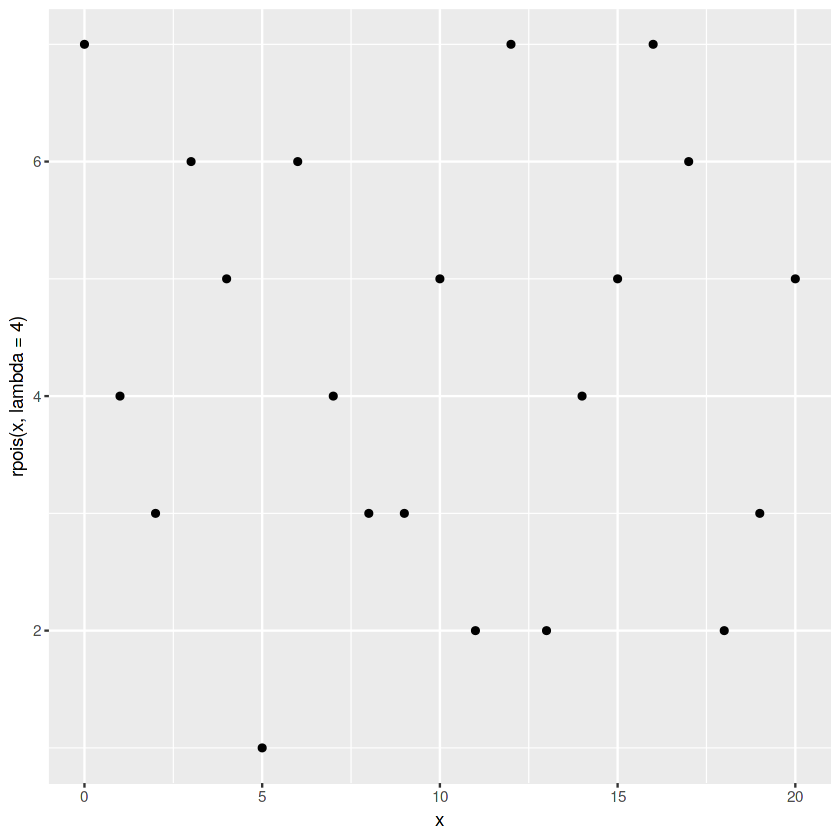

In [4]:
#20 random generations of poission distributions for a lambda of 4
ggplot(data.frame(x=c(0:20)), aes(x)) +
geom_point(aes(y=rpois(x, lambda=4)))

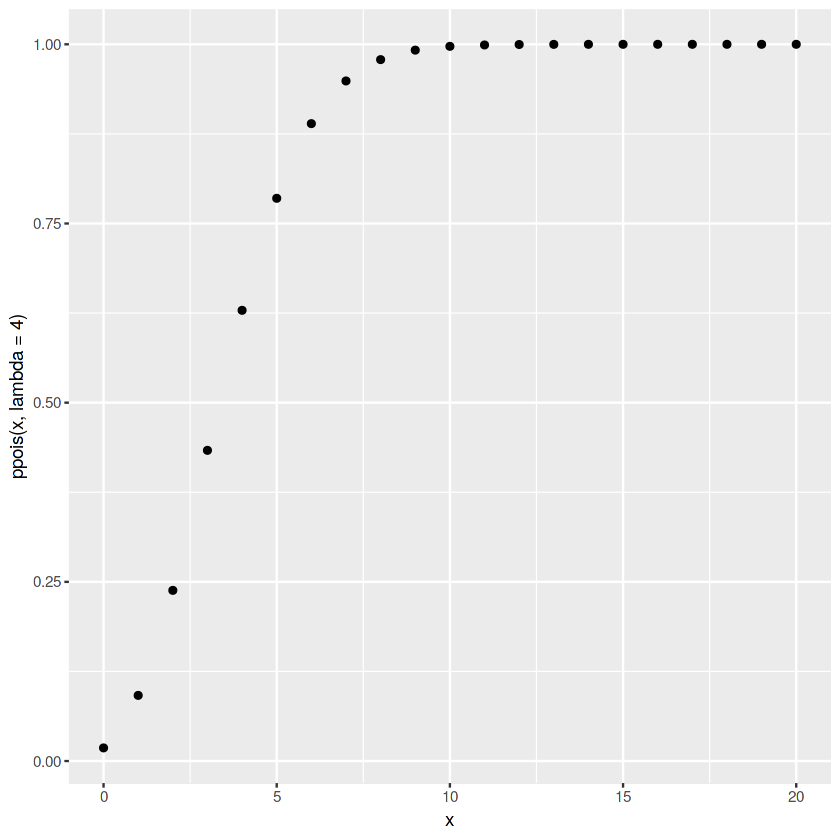

In [5]:
#this looks cumulative and only really tells us we've observed most probabilities
#after considering up to only 11 chips
ggplot(data.frame(x=c(0:20)), aes(x)) +
geom_point(aes(y=ppois(x, lambda=4)))

<b>Hypothesis Test with Possion</b>

In [8]:
#EnvStats has some very specific hypothesis tests in it
#my_htest = chenTTest(EPA.02d.Ex.9.mg.per.L.vec, mu = 30)

In [18]:
help(poisson.test)